In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [2]:
concrete_strength = pd.read_csv("../dataset/Concrete_Data.csv")

In [3]:
concrete_strength

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [25]:
split_col = "Superplasticizer (component 5)(kg in a m^3 mixture)"
target_col = "Concrete compressive strength(MPa, megapascals) "

concrete_strength_sorted = concrete_strength.sort_values(split_col).reset_index(drop=True)

concrete_strength_sorted.loc[:len(concrete_strength_sorted)//3, "domain"] = "low"
concrete_strength_sorted.loc[len(concrete_strength_sorted)//3: (len(concrete_strength_sorted)//3)*2, "domain"] = "medium"
concrete_strength_sorted.loc[(len(concrete_strength_sorted)//3)*2:, "domain"] = "high"
concrete_strength_sorted.drop(columns=split_col,inplace=True)

In [23]:
def plot_tsne(df, split_col, target_col):

    features_ori = df.drop(columns=[split_col,target_col]).sample(1000)
    is_cat_cols = features_ori.dtypes == object
    cat_cols = features_ori.columns[is_cat_cols]
    num_cols = features_ori.columns[~is_cat_cols]

    onehot = OneHotEncoder(sparse=False)
    features_cat = onehot.fit_transform(features_ori[cat_cols])

    features_num = features_ori[num_cols].values

    print(features_cat.shape, features_num.shape)
    features_ori = np.concatenate([features_num, features_cat], axis=1)
    scaler = StandardScaler()
    features = scaler.fit_transform(features_ori)

    tsne = TSNE(perplexity=10, random_state=0)
    features_embedd = tsne.fit_transform(features)

    df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
    df_embedd[split_col] = df[split_col]
    df_embedd[target_col] = df[target_col]

    sns.relplot(x="embedd_x", y="embedd_y", hue=target_col, col=split_col, data=df_embedd)

(1000, 0) (1000, 7)


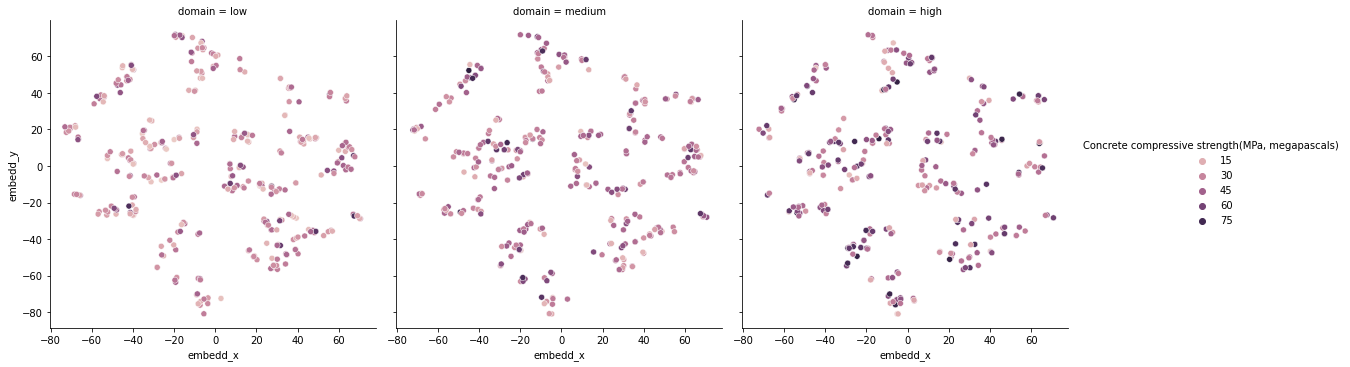

In [26]:
plot_tsne(concrete_strength_sorted, "domain", target_col)